In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.io import loadmat
data = loadmat('D:/ProgrammingBook/AndrewNg/ex6data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [7]:
df = pd.DataFrame(data['X'], columns=['x1','x2'])
df['y'] = data['y']
positive = df[df['y']==1]
negative = df[df['y']==0]
print(positive.shape, negative.shape,data['y'].shape)

(21, 3) (30, 3) (51, 1)


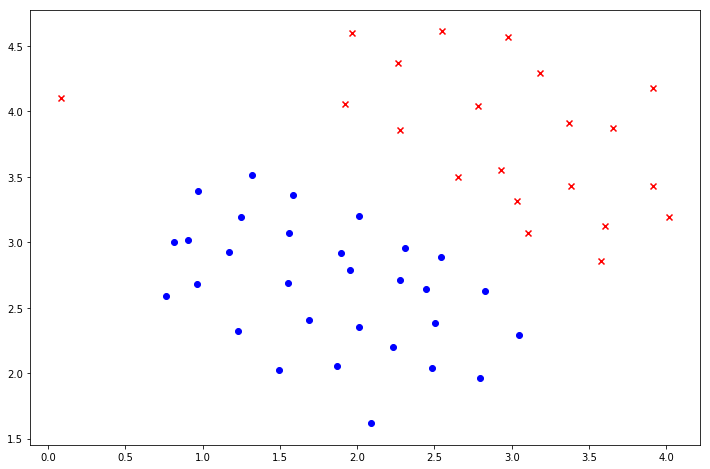

In [9]:
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['x1'], positive['x2'], c = 'r', marker = 'x')
ax.scatter(negative['x1'], negative['x2'], c = 'b', marker = 'o')
plt.show()

In [24]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss = 'hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [25]:
svc.fit(df[['x1','x2']], data['y'])
svc.score(df[['x1','x2']], data['y'])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [26]:
svc = svm.LinearSVC(C=100, loss = 'hinge', max_iter=1000)
svc.fit(df[['x1','x2']], data['y'])
svc.score(df[['x1','x2']], data['y'])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9019607843137255

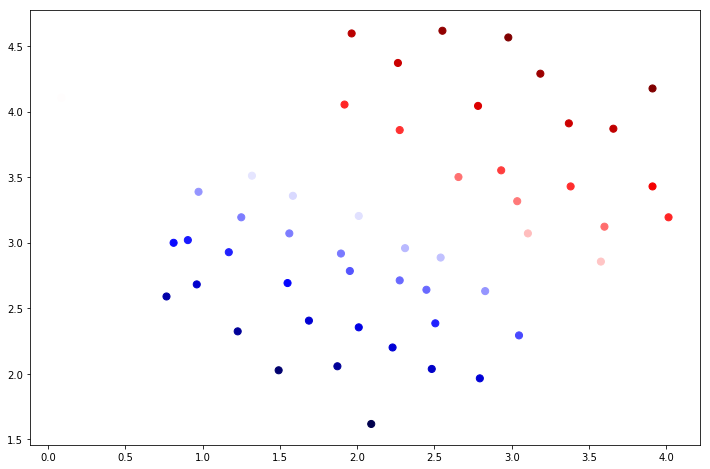

In [29]:
df['SVM_1_Confidence'] = svc.decision_function(df[['x1','x2']])
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(df['x1'], df['x2'], s = 50, 
           c = df['SVM_1_Confidence'], cmap = 'seismic')
plt.show()#c=100

In [30]:
svc = svm.LinearSVC(C=1, loss = 'hinge', max_iter=1000)
svc.fit(df[['x1','x2']], data['y'])
svc.score(df[['x1','x2']], data['y'])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

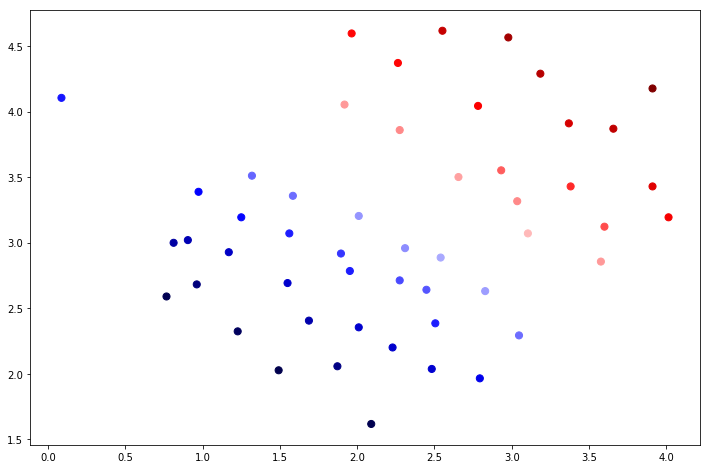

In [31]:
df['SVM_2_Confidence'] = svc.decision_function(df[['x1','x2']])
fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(df['x1'], df['x2'], s = 50, 
           c = df['SVM_2_Confidence'], cmap = 'seismic')
plt.show()#c=1